In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

pd.options.mode.chained_assignment = None

In [2]:
# Specify the path to your data in Google Drive or locally
filePath = "../data/complete_COVID_SAMPLES.tsv" 

df = pd.read_table(filePath, low_memory=False, engine="c")

optional_fields = ['hospitalized']

In [3]:
# Select the columns that are listed above
df = df[['sample','frequency', 'templates', 'amino_acid', 'rearrangement', 'v_resolved', 'd_resolved','j_resolved','hospitalized']]

# Rename the columns 
df.columns = ['sample', 'freq' , '#count' , 'cdr3aa' , 'cdr3nt' , 'v' , 'd' , 'j' , 'hospitalized']

In [4]:
# Create a dataframe with reads count for each sample
df_reads = df.groupby(['sample', 'hospitalized']).agg(
    {'#count': 'sum'}).reset_index().rename(columns={'#count': "count"})

# Create a dataframe with clonotype count for each sample
df_diversity = df.groupby(['sample', 'hospitalized'], sort=False).size(
).reset_index(name='clonotype_count')

In [5]:
# Add clonotype count of each sample as a column to create a new dataframe
df = pd.merge(df, df_diversity, on=['sample', 'hospitalized'])

df

,sample,freq,#count,cdr3aa,cdr3nt,v,d,j,hospitalized,clonotype_count
0,6232BW_TCRB,0.006751,3636,CASSLGLAGPGFF,ACGATCCAGCGCACAGAGCAGGAGGACTCGGCCGTGTATCTCTGTG...,TCRBV07-02,TCRBD02-01*02,TCRBJ02-01*01,True,218977
1,6232BW_TCRB,0.005639,3037,CASRVGSSYNEQFF,ATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCA...,TCRBV12,TCRBD02-01*02,TCRBJ02-01*01,True,218977
2,6232BW_TCRB,0.004258,2293,CASNPYRVNTGELFF,GAGTCGCCCAGCCCCAACCAGACCTCTCTGTACTTCTGTGCCAGCA...,TCRBV27-01*01,TCRBD02-01*02,TCRBJ02-02*01,True,218977
3,6232BW_TCRB,0.003639,1960,CASSALRSSYNEQFF,CAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTGCCAGCT...,TCRBV12,unknown,TCRBJ02-01*01,True,218977
4,6232BW_TCRB,0.003521,1896,CASSFEDEGGETQYF,AACGCCTTGTTGCTGGGGGACTCGGCCCTCTATCTCTGTGCCAGCA...,TCRBV05-06*01,unknown,TCRBJ02-05*01,True,218977
...,...,...,...,...,...,...,...,...,...,...
15061643,1566265BW_TCRB,0.000001,1,CSVEDLRGGYTF,CTGACTGTGAGCAACATGAGCCCTGAAGACAGCAGCATATATCTCT...,TCRBV29-01,unknown,TCRBJ01-02*01,False,453526
15061644,1566265BW_TCRB,0.000001,1,CASGRRGDYGYTF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,unknown,TCRBJ01-02*01,False,453526
15061645,1566265BW_TCRB,0.000001,1,CASSWTGNSPLHF,AAGATCCAGCCCTCAGAACCCAGGGACTCAGCTGTGTACTTCTGTG...,TCRBV12-03/12-04*01,TCRBD02-01,TCRBJ01-06*02,False,453526
15061646,1566265BW_TCRB,0.000001,1,CASSLDWTEYYEQYF,CAGCCTGCAAAGCTTGAGGACTCGGCCGTGTATCTCTGTGCCAGCA...,TCRBV11-02*01,TCRBD01-01*01,TCRBJ02-07*01,False,453526


## Figure1a - clonotype counts

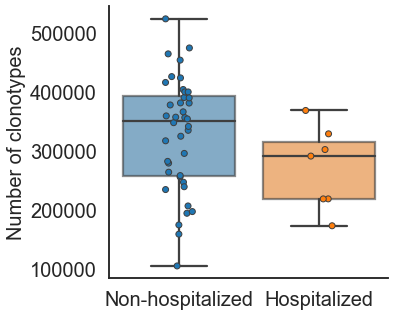

In [6]:
attribute = "hospitalized"

sns.set_style("white") 
sns.set_context("talk")

ax = plt.subplots(figsize=(5,5))

ax = sns.boxplot(x=attribute, y='clonotype_count', data=df_diversity, boxprops=dict(alpha=0.6))
sns.stripplot(x=attribute, y='clonotype_count', data=df_diversity, s=6, dodge=True, linewidth=1)

ax.set(xlabel=None)
ax.set_ylabel('Number of clonotypes', fontsize=20)
xlabels = ['Non-hospitalized','Hospitalized']
ax.set_xticklabels(xlabels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

plt.savefig("../figures/main/figure1a.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1a.png",bbox_inches="tight")

plt.show()

## Figure1b - Shannon-Wiener index

In [7]:
# calculation step 1
df['shannon_index'] = -(df['freq']*np.log(df['freq']))

# calculation step 2
df_shannon = df.groupby(['sample', 'hospitalized']).agg(
    {'shannon_index': 'sum'}).reset_index().rename(columns={'': "shannon_index"})

# calculation step 3, Shannon-Wienex index is shown in the shannon_wiener_index column
df_shannon['shannon_wiener_index'] = np.exp(df_shannon['shannon_index'])
df_shannon_index = df_shannon[[
    'sample', 'hospitalized', 'shannon_wiener_index']]

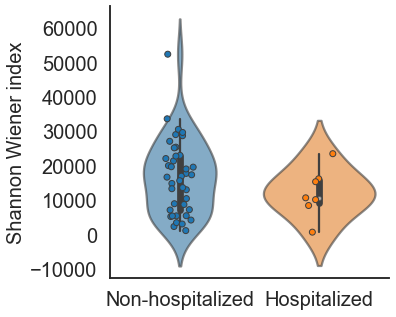

In [8]:
attribute = "hospitalized"

sns.set_style("white") 
sns.set_context("talk")

ax = plt.subplots(figsize=(5,5))

ax = sns.violinplot(x=attribute, y='shannon_wiener_index', data=df_shannon_index)
plt.setp(ax.collections, alpha=0.6)
sns.stripplot(x=attribute, y='shannon_wiener_index', data=df_shannon_index, s=6, dodge=True, linewidth=1)

ax.set(xlabel=None)
ax.set_ylabel('Shannon Wiener index', fontsize=20)
xlabels = ['Non-hospitalized','Hospitalized']
ax.set_xticklabels(xlabels)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sns.despine()

plt.savefig("../figures/main/figure1b.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1b.png",bbox_inches="tight")

plt.show()

## Figure1c - Relative abundance

In [9]:
# Define clonotype groups based on frequency
def clonotype_group (row):
    if row['freq'] > 0.01 and row['freq'] <= 1:
        return 'Hyperexpanded'
    if row['freq'] > 0.001 and row['freq'] <= 0.01: 
        return 'Large'
    if row['freq'] > 0.0001 and row['freq'] <= 0.001:
        return 'Medium'
    if row['freq'] > 0.00001 and row['freq'] <= 0.0001:
        return 'Small'
    if row['freq'] > 0 and row['freq'] <= 0.00001:
        return 'Rare'

# Apply the clonotype_group function to the dataframe
df['clonotype_group'] = df.apply (lambda row: clonotype_group(row),axis=1)

# Calculate the relative abundance in each sample based on clonotype groups
df_relative_abundance= df.groupby(['sample','hospitalized','clonotype_group']).agg({'freq':'sum'}).reset_index().rename(columns={'':"relative_abundance"})
df_relative_abundance

,sample,hospitalized,clonotype_group,freq
0,1132289BW_TCRB,False,Large,0.014510
1,1132289BW_TCRB,False,Medium,0.048889
2,1132289BW_TCRB,False,Rare,0.635481
3,1132289BW_TCRB,False,Small,0.120081
4,1222568BW_TCRB,False,Large,0.042535
...,...,...,...,...
209,964229BW_TCRB,False,Small,0.104677
210,989003BW_TCRB,True,Large,0.024762
211,989003BW_TCRB,True,Medium,0.026716
212,989003BW_TCRB,True,Rare,0.667887


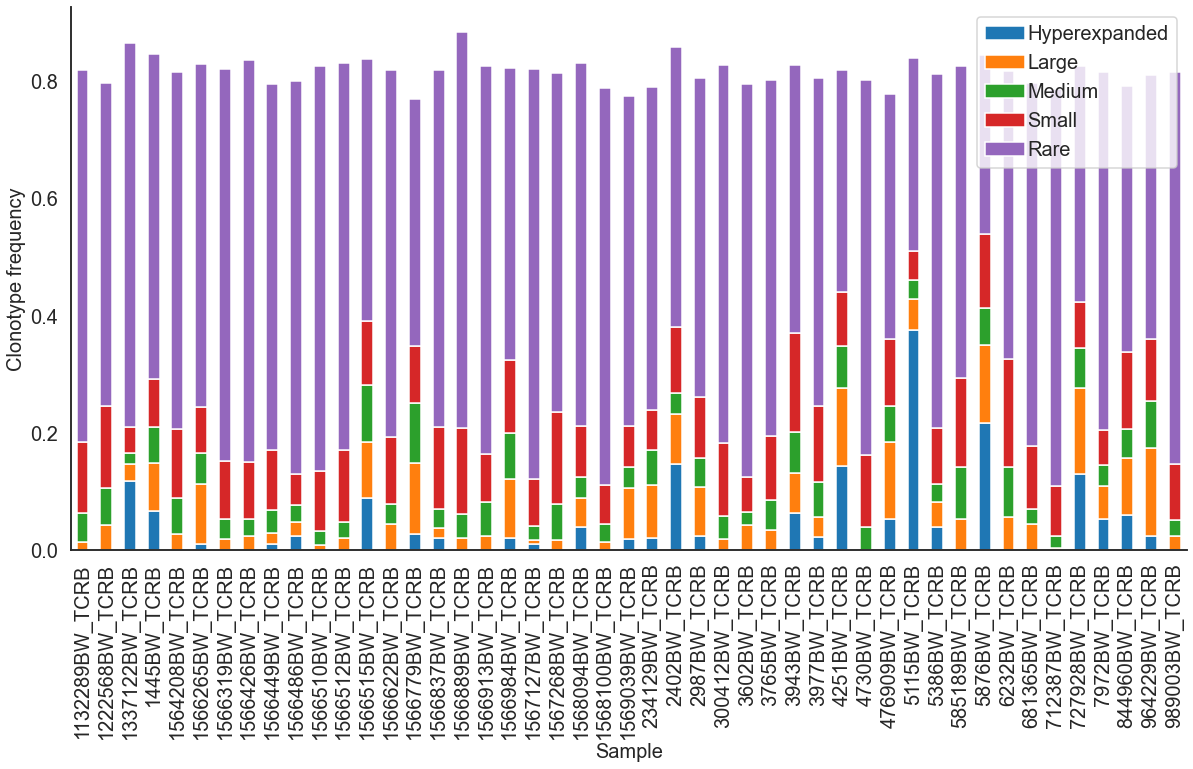

In [10]:
sns.set_style("white") 
sns.set_context("talk")

label_order = ['Hyperexpanded', 'Large', 'Medium', 'Small', 'Rare']

ax = df_relative_abundance.groupby(['sample','clonotype_group'])['freq'].sum().unstack()[label_order].plot(kind='bar', stacked=True)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:], labels[0:], loc='upper right', bbox_to_anchor=(1, 1), handletextpad=0.1, prop={'size': 20})

ax.set_xlabel('Sample',fontsize=20)
ax.set_ylabel('Clonotype frequency',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.gcf().set_size_inches(20,10)
sns.despine()

plt.savefig("../figures/main/figure1c.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1c.png",bbox_inches="tight")

plt.show()

## Figure1d - Motif counts

In [11]:
df['aa_length'] = df['cdr3aa'].str.len()

df_aa_spectratype = df.groupby(['sample', 'hospitalized', 'aa_length'], as_index=False)[
    'freq'].agg({'spectratype': 'sum'})

In [12]:
df_aa_max_spectratype = df_aa_spectratype.loc[df_aa_spectratype.groupby('sample')[
    'spectratype'].idxmax()]

In [13]:
# Define the function to count amino acid motifs (k is the length of the motif)
def aamotif(k, aa_list):
    aamotifCount = {}
    for aa in aa_list:
        for i in range(len(aa)-k+1):
            aamotif = aa[i:i+k]
            aamotifCount[aamotif] = aamotifCount.get(aamotif, 0)+1
    return aamotifCount

# Create an empty dataframe for storing results
df_aa_motif = pd.DataFrame()

# Create a list of the sample names
samples = set(df['sample'])

for sample in samples:

    # Store the rows related to the sample
    df_temp = df.loc[df['sample'] == sample]

    # Use amino acid motif length of 6 as an example
    df_temp = aamotif(6, df_temp['cdr3aa'])
    df_temp = pd.DataFrame(df_temp.items(), columns=['motif', 'count'])
    df_temp['sample'] = sample

    # Append the dataframe based on amino acid motifs and stores in the result dataframe
    df_aa_motif = df_aa_motif.append(df_temp, ignore_index=True)

    # Add the hospitalization information as a column
    df_aa_motif_1 = df_aa_motif.merge(
        df_aa_max_spectratype[['sample', 'hospitalized']], on='sample')

In [14]:
# Remove motif counts that are less than 9999
df_aa_motif_1 = df_aa_motif_1[df_aa_motif_1['count'] > 9999]

# Select the motifs that present in more than 2 samples
df_aa_motif_2 = df_aa_motif_1.groupby(['hospitalized','motif'], sort=False).size().reset_index(name='number_of_samples')
df_aa_motif_2 = df_aa_motif_2[df_aa_motif_2['number_of_samples'] > 2]
df_aa_motif_1 = pd.merge(df_aa_motif_1, df_aa_motif_2, on=['hospitalized','motif'])
df_aa_motif_1

,motif,count,sample,hospitalized,number_of_samples
0,TDTQYF,15817,1568094BW_TCRB,True,7
1,TDTQYF,12526,5115BW_TCRB,True,7
2,TDTQYF,24460,5386BW_TCRB,True,7
3,TDTQYF,18456,989003BW_TCRB,True,7
4,TDTQYF,16219,2987BW_TCRB,True,7
...,...,...,...,...,...
345,SYNEQF,17392,1566486BW_TCRB,False,3
346,NEKLFF,10520,1566889BW_TCRB,False,4
347,NEKLFF,10961,1566486BW_TCRB,False,4
348,NEKLFF,12276,1566265BW_TCRB,False,4


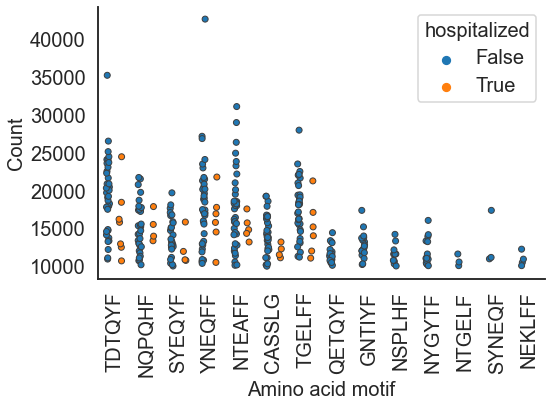

In [18]:
attribute = "hospitalized"

sns.set_style("white") 
sns.set_context("talk")

ax = plt.subplots(figsize=(8,5))

ax = sns.stripplot(data=df_aa_motif_1, x='motif', y='count', hue=attribute, dodge=True, size=6, linewidth=1)

ax.set_xlabel('Amino acid motif', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20)
plt.setp(ax.get_legend().get_texts(), fontsize='20')
plt.setp(ax.get_legend().get_title(), fontsize='20')
sns.despine()

plt.savefig("../figures/main/figure1d.pdf",bbox_inches="tight")
plt.savefig("../figures/main/figure1d.png",bbox_inches="tight")

plt.show()